In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("C:/diabetes.csv")

In [3]:
d.index

RangeIndex(start=0, stop=768, step=1)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
d.shape

(768, 9)

In [6]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
d.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
d.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a41b983d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a41b9e4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a41b983af0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a41b9e4850>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a41b9e4af0>,
 'means': []}

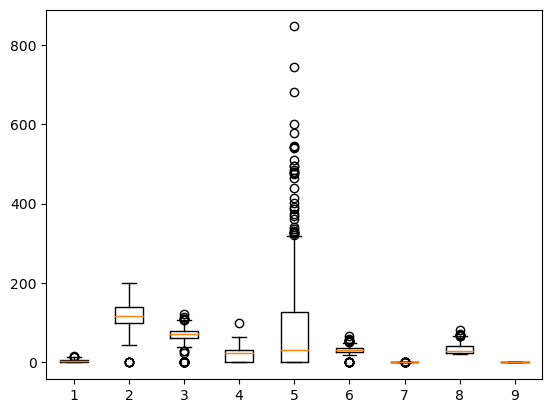

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(d)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a41bac78e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a41bac7d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a41bac7640>],
 'medians': [<matplotlib.lines.Line2D at 0x2a41baf8280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a41baf8520>],
 'means': []}

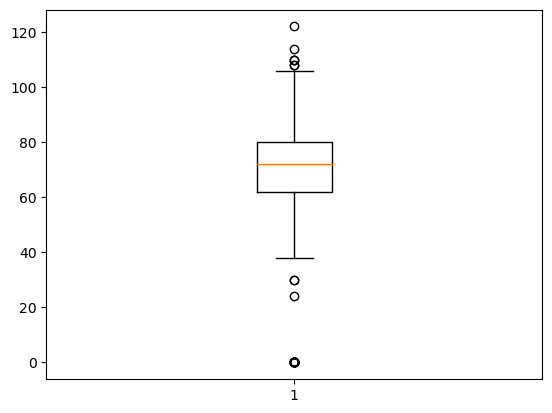

In [16]:
plt.boxplot(d['BloodPressure'])

In [18]:
BloodPressure_df = pd.DataFrame(d['BloodPressure'])
q1 = BloodPressure_df.quantile(q=0.25)
q3 = BloodPressure_df.quantile(q=0.75)
IQR = q3 - q1

ll = int(q1  - (1.5*IQR))
ul = int(q3  + (1.5*IQR))

d.loc[d['BloodPressure']<ll, 'BloodPressure'] = int(BloodPressure_df.quantile(q=0.20))
d.loc[d['BloodPressure']>ul, 'BloodPressure'] = int(BloodPressure_df.quantile(q=0.90))

{'whiskers': [<matplotlib.lines.Line2D at 0x2a41d3bf100>,
 'caps': [<matplotlib.lines.Line2D at 0x2a41d3bf670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a41d3bee60>],
 'medians': [<matplotlib.lines.Line2D at 0x2a41d3bfbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a41d3bfe50>],
 'means': []}

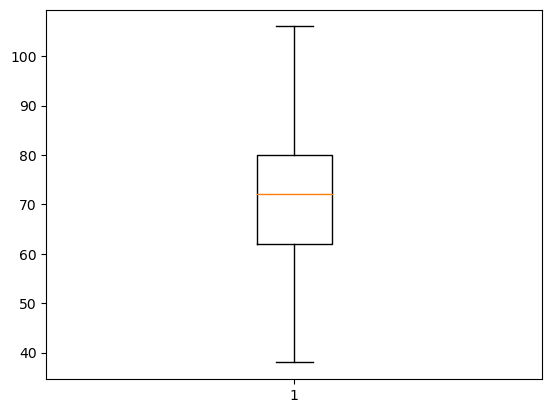

In [19]:
plt.boxplot(d['BloodPressure'])

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

f = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
r = ['Outcome']

x = d[f]
y = d[r]

xt, xxt, yt, yyt = train_test_split(x, y, test_size = 0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(xt, yt)

yt_pred = clf.predict(xt)
yyt_pred = clf.predict(xxt)

a = metrics.accuracy_score(yt_pred, yt)
aa = metrics.accuracy_score(yyt_pred, yyt)

print(a)
print(aa)

1.0
0.7662337662337663


In [32]:
clf1 = DecisionTreeClassifier()
print(cross_val_score(clf1, xt, yt, cv = 10, scoring = 'accuracy').mean())

0.70193019566367


[Text(0.5080158622559653, 0.96875, 'x[1] <= 133.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(0.23864560737527116, 0.90625, 'x[7] <= 28.5\ngini = 0.328\nsamples = 425\nvalue = [337, 88]'),
 Text(0.17129880694143168, 0.84375, 'x[5] <= 45.4\ngini = 0.18\nsamples = 230\nvalue = [207, 23]'),
 Text(0.13218546637744036, 0.78125, 'x[1] <= 127.5\ngini = 0.161\nsamples = 226\nvalue = [206, 20]'),
 Text(0.07998915401301518, 0.71875, 'x[0] <= 7.5\ngini = 0.125\nsamples = 209\nvalue = [195, 14]'),
 Text(0.07131236442516269, 0.65625, 'x[5] <= 32.3\ngini = 0.117\nsamples = 208\nvalue = [195, 13]'),
 Text(0.01735357917570499, 0.59375, 'x[6] <= 0.672\ngini = 0.016\nsamples = 121\nvalue = [120, 1]'),
 Text(0.008676789587852495, 0.53125, 'gini = 0.0\nsamples = 103\nvalue = [103, 0]'),
 Text(0.026030368763557483, 0.53125, 'x[6] <= 0.686\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.01735357917570499, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03470715835140998, 0.

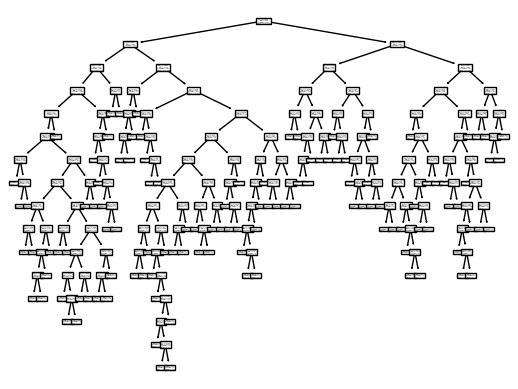

In [30]:
from sklearn import tree
tree.plot_tree(clf)

[Text(0.5, 0.875, 'x[1] <= 133.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.328\nsamples = 425\nvalue = [337, 88]'),
 Text(0.125, 0.375, 'x[5] <= 45.4\ngini = 0.18\nsamples = 230\nvalue = [207, 23]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.444\nsamples = 195\nvalue = [130, 65]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.458\nsamples = 189\nvalue = [67, 122]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\ngini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[0] <= 6.5\ngini = 0.387\nsamples = 141\nvalue = [37, 104]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

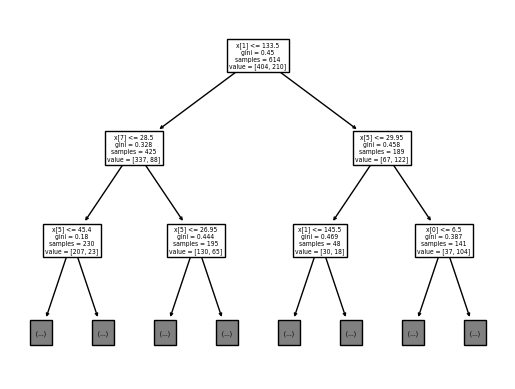

In [33]:
from sklearn import tree
tree.plot_tree(clf, max_depth = 2)